In [1]:
import pandas as pd

In [3]:
df = pd.read_excel('/home/preethi/Desktop/jupyter/Tips Quick EDA exercise v0.1 (5).xlsx')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0


# 1. What is the overall average 'tip'.

In [4]:
len(df['tip'])

245

In [5]:
df.tip.unique()

array([ 1.01,  1.66,  3.5 ,  3.31,  3.61,  4.71,  2.  ,  3.12,  1.96,
        3.23,  1.71,  5.  ,  1.57,  3.  ,  3.02,  3.92,  1.67,  3.71,
        3.35,  4.08,  2.75,  2.23,  7.58,  3.18,  2.34,  4.3 ,  1.45,
        2.5 ,  2.45,  3.27,  3.6 ,  3.07,  2.31,  2.24,  2.54,  3.06,
        1.32,  5.6 ,  6.  ,  2.05,  2.6 ,  5.2 ,  1.56,  4.34,  3.51,
        1.5 ,  1.76,  6.73,  3.21,  1.98,  3.76,  2.64,  3.15,  2.47,
        1.  ,  2.01,  2.09,  1.97,  3.14,  2.2 ,  1.25,  3.08,  4.  ,
        2.71,  3.4 ,  1.83,  2.03,  5.17,  5.85,  3.25,  4.73,  3.48,
        1.64,  4.06,  4.29,  2.55,  5.07,  1.8 ,  2.92,  1.68,  2.52,
        4.2 ,  1.48,  2.18,  2.83,  6.7 ,  2.3 ,  1.36,  1.63,  1.73,
        2.74,  5.14,  3.75,  2.61,  4.5 ,  1.61, 10.  ,  3.16,  5.15,
        3.11,  3.55,  3.68,  5.65,  6.5 ,  4.19,  2.56,  2.02,  1.44,
        3.41,  5.16,  9.  ,  1.1 ,  3.09,  1.92,  1.58,  2.72,  2.88,
        3.39,  1.47,  1.17,  4.67,  5.92,  1.75,   nan])

In [6]:
df.tip.mode().iloc[0]

2.0

In [7]:
df['tip'].fillna(df.tip.mode().iloc[0], inplace = True)

In [8]:
sum(df['tip'])

733.58

In [9]:
#average
average = sum(df['tip'])/len(df['tip'])
average

2.9942040816326534

# 2. Get the numerical summary for the 'tip' - are the median and mean very different? What does they tell you about the field?

In [10]:
df['tip'].describe()

count    245.000000
mean       2.994204
std        1.382272
min        1.000000
25%        2.000000
50%        2.880000
75%        3.550000
max       10.000000
Name: tip, dtype: float64

In [11]:
import numpy as np
np.mean(df['tip'])

2.9942040816326534

In [12]:
np.median(df['tip'])

2.88

# 3. Prepare a boxplot for 'tip',are there any outliers?

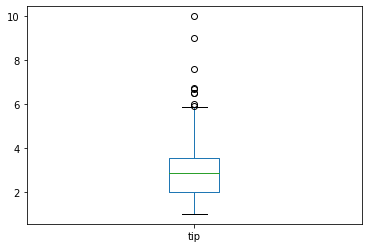

In [13]:
df['tip'].plot(kind = 'box')

# 4. Prepare a boxplot for 'total bill',are there any outliers?

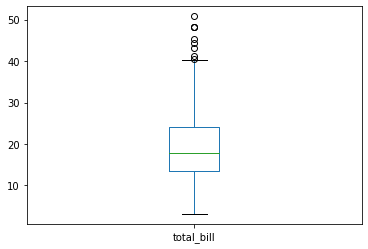

In [14]:
df['total_bill'].plot(kind = 'box')

# 5. Gender: what is the percent of females in the data?

In [15]:
df.sex.value_counts()

Male                   157
Female                  87
0.35655737704918034      1
Name: sex, dtype: int64

In [16]:
df.sex.mode().iloc[0]

'Male'

In [17]:
df['sex'] = df['sex'].replace(0.35655737704918034,df.sex.mode().iloc[0])

In [18]:
df.sex.value_counts()

Male      158
Female     87
Name: sex, dtype: int64

In [19]:
df.sex.value_counts().sum()

245

In [20]:
df.sex.value_counts()[1]

87

In [21]:
percent_of_female = (df.sex.value_counts()[1])/(df.sex.value_counts().sum())*100
percent_of_female

35.51020408163265

In [22]:
percent_of_male = (df.sex.value_counts()[0])/(df.sex.value_counts().sum())*100
percent_of_male

64.48979591836735

# 6. Prepare a barplot with the bars representing the percentage of records for each gender

In [47]:
import matplotlib.pyplot as plt

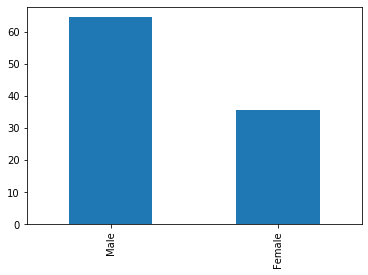

In [51]:
gender_wise_percentage=df['sex'].value_counts(normalize=True)*100
gender_wise_percentage.plot(kind='bar')
plt.show()

## 7. Does the average tip differ by gender? Does one gender tip more than the other?

In [48]:
df.groupby('sex').mean()

,total_bill,tip,size,pct_tip
sex,,,,
Female,18.056897,2.833448,2.459770,0.166491
Male,20.744076,3.082722,2.630573,0.157651


Yes, on an average male gives more tip than female ones.

In [24]:
df[['sex','tip']].head()

,sex,tip
0,Female,1.01
1,Male,1.66
2,Male,3.50
3,Male,3.31
4,Female,3.61


Yes, one gender tip is more than the other as we can see in the above dataframe.

# 8. Does the average tip differ by the time of the day?

In [52]:

df.pivot_table(index='day', columns='time', values='tip')

time,Dinner,Lunch
day,,
Fri,2.940000,2.382857
Sat,2.993103,NaN
Sun,3.255132,NaN
Thur,3.000000,2.767705


Yes, tip varies by time of the day as the highest average tip is on sunday during dinner.

# 9. Does the average tip differ by size ( number of people at the table )?

In [53]:
df.groupby('size')['tip'].mean()

size
1.0    1.437500
2.0    2.582308
3.0    3.393158
4.0    4.135405
5.0    4.028000
6.0    5.225000
Name: tip, dtype: float64

Yes, the tip differs by the size as the number of people at the table is more than the tip is more.

# Do smokers tip more than non-smokers?

In [55]:
df[['tip','smoker']].head()

,tip,smoker
0,1.01,No
1,1.66,No
2,3.50,No
3,3.31,No
4,3.61,No


In [56]:
df['smoker'].unique()

array(['No', 'Yes', 0.6188524590163934], dtype=object)

In [57]:
df['smoker'].mode().iloc[0]

'No'

In [58]:
df['smoker'] = df['smoker'].replace(0.6188524590163934,df['smoker'].mode().iloc[0])
df['smoker'].unique()

array(['No', 'Yes'], dtype=object)

In [59]:
df.groupby('smoker')['tip'].count()

smoker
No     152
Yes     93
Name: tip, dtype: int64

Yes,smoker tip is more than non-smoker as we can see in the above dataframe.

# 11. Gender vs. smoker/non-smoker and tip size - create a 2 by 2 and get the average tip size. Which group tips the most?

In [61]:
df.pivot_table(index ='sex',columns = 'smoker',values = 'tip')

smoker,No,Yes
sex,,
Female,2.773519,2.931515
Male,3.102041,3.051167


Non-smoker MALE tips the most.

# 12. Create a new metric called 'pct_tip' = tip/total_bill - this would be percent tip give, and should be a better measure of the tipping behaviour.

In [62]:
df['tip'].count()

245

In [63]:
df['total_bill'].count()

244

In [65]:
pct_tip = (df['tip']/df['total_bill'])*100
df['pct_tip'] = pct_tip
df.head()

,total_bill,tip,sex,smoker,day,time,size,pct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2.0,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3.0,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3.0,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2.0,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4.0,14.680765


# 13. Does the pct_tip differ by gender? Does one gender tip more than the other?

In [68]:
df.pivot(columns = 'sex',values = 'pct_tip').count()

sex
Female     87
Male      157
dtype: int64

male tip is more than female tip.

# 14. Does the pct_tip differ by size?

In [70]:
df.pivot(columns = 'size',values = 'pct_tip').count()

size
NaN      0
1.0      4
2.0    156
3.0     38
4.0     37
5.0      5
6.0      4
dtype: int64

Yes, the pct_tip differ by size, 2nd is the highest.

# 15. Make the gender vs smoker view using pct_tip- does your inference change?

In [77]:
df.pivot_table(index = 'sex',columns = 'smoker',values='pct_tip')

smoker,No,Yes
sex,,
Female,15.692097,18.215035
Male,16.066872,15.277118


Female smoker has the highest pct_tip.

# 16. Make a scatter plot of total_bill vs tip

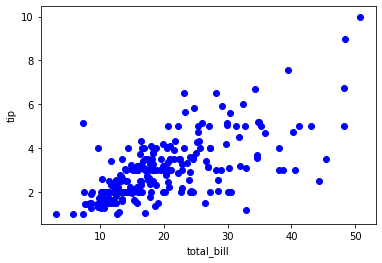

In [75]:
plt.scatter(df['total_bill'],df['tip'],c='b')
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.show()

# 17. Make a scatter plot of total_bill vs pct_tip.

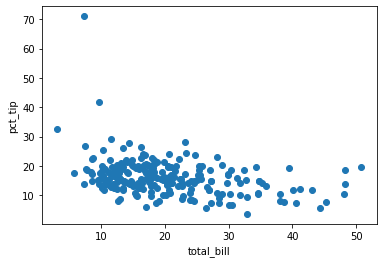

In [74]:
plt.scatter(df['total_bill'],df['pct_tip']);
plt.xlabel('total_bill')
plt.ylabel('pct_tip')
plt.show()